<a href="https://colab.research.google.com/github/KotagiriRohan/MicroGrad/blob/main/Micro_gradient_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import graphviz

In [13]:
def draw_graph(root):
    dot = graphviz.Digraph(comment="Connection Graph", graph_attr={'rankdir': 'LR'})
    nodes = set()

    def build(node):
        if node not in nodes:
            nodes.add(node)
            dot.node(name=str(id(node)), label="{ data %.4f | grad %.4f }" % (node.data, node.grad), shape='record')
            if node.op:
                dot.node(name=str(id(node)) + node.op, label=node.op)
                dot.edge(str(id(node)) + node.op, str(id(node)))
            for child in node.prev:
                dot.edge(str(id(child)), str(id(node)) + node.op)
                build(child)

    build(root)
    return dot


class Value:
    def __init__(self, data, children=(), op=''):
        self.data = data
        self.prev = set(children)
        self.grad = 0.0
        self.op = op

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        return out

    def __pow__(self, power, modulo=None):
        assert isinstance(power, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data ** power, (self,), f'**{power}')
        return out

    def __truediv__(self, other):  # self / other
        return self * other ** -1

    def __sub__(self, other):  # self - other
        return self + (-other)

    def __neg__(self):  # -self
        return self * -1

    def __rmul__(self, other):
        return self * other

    def __repr__(self):
        return f"Value(data={self.data}, children={self.prev})"



Value(data=-0.5, children={Value(data=-2, children={Value(data=-1, children=set()), Value(data=2, children=set())}), Value(data=0.25, children={Value(data=4, children=set())})})


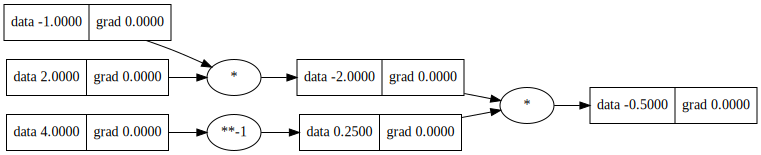

In [16]:
x = -Value(2) / Value(4)
print(x)

draw_graph(x)